In [3]:
import pandas as pd
import numpy as np
import warnings

from pandas_profiling import ProfileReport

warnings.filterwarnings("ignore", category=UserWarning)

# Explanatory Data Analysis

## Data Analysis with Pandas Profiling

In [ ]:
df = pd.read_csv('input/cybersecurity_training.csv', sep='|')
report = ProfileReport(df, title='Profiling Report')
report.to_file(output_file='output/report_suspicious_network_event_recognition')

In [ ]:
pd.set_option("display.max_columns",50)

In [ ]:
data = pd.read_csv('input/localized_alerts_data.csv', sep='|', low_memory=False)

In [3]:
features_num = data.select_dtypes('number').columns.tolist()
data[features_num] = data.select_dtypes('number').applymap(np.float64)
data.head()

,alert_ids,alerttype,devicetype,reportingdevice_code,devicevendor_code,srcip,dstip,srcipcategory,dstipcategory,srcport,...,srcportcategory,dstportcategory,direction,alerttime,severity,count,domain,protocol,username,signature
0,AAB,NAC: Asset Visibility,NAC,Wji,QO,10.NF.KO.199,NaN,PRIV-10,INTERNET,0.0,...,1.0,1.0,5.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0
1,AAC,ThreatWatch Outbound,FW,GFv,JS,192.SL.XK.61,YT.LB.32.21,PRIV-192,INTERNET,63723.0,...,4.0,2.0,3.0,0.0,5.0,19.0,0.0,NaN,1.0,1.0
2,AAE,ThreatWatch Outbound,FW,tMU,SX,10.CN.AE.137,EB.QD.27.77,PRIV-10,INTERNET,59806.0,...,4.0,3.0,3.0,0.0,3.0,10.0,0.0,NaN,0.0,1.0
3,AAL,ThreatWatch Outbound,FW,xQn,SX,172.AT.TL.37,YT.LB.34.21,PRIV-172,INTERNET,63496.0,...,4.0,2.0,3.0,0.0,5.0,1.0,0.0,NaN,0.0,1.0
4,AAL,ThreatWatch Inbound,FW,xQn,SX,YT.LB.34.21,YT.EK.108.146,INTERNET,INTERNET,443.0,...,2.0,4.0,2.0,1311.0,5.0,1.0,0.0,NaN,0.0,1.0


In [ ]:
report_data = ProfileReport(data, title='Profiling Report', correlations={
    "pearson": {"calculate": True},
    "spearman": {"calculate": True},
    "kendall": {"calculate": True},
    "phi_k": {"calculate": False},
    "cramers": {"calculate": True},
} )
report_data.to_file(output_file='output/reports/report_localized_alerts_data')

In [ ]:
# report.to_widgets()
# report.to_notebook_iframe()

## Preparations

In [16]:
# Trying to analyze cybersecurity_training and cybersecurity_test datasets
df_train = pd.read_csv('input/cybersecurity_training.csv', sep='|', index_col=0)
df_test = pd.read_csv('input/cybersecurity_test.csv', sep='|', index_col=0)
print(df_train.shape)
print(df_test.shape)
df_full = pd.concat([df_train, df_test])
df_full.info()

(39427, 62)
(20000, 61)
<class 'pandas.core.frame.DataFrame'>
Index: 59427 entries, Nhq to ADa
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_code               59427 non-null  object 
 1   notified                  39427 non-null  float64
 2   categoryname              59427 non-null  object 
 3   ip                        59427 non-null  object 
 4   ipcategory_name           59427 non-null  object 
 5   ipcategory_scope          59427 non-null  object 
 6   parent_category           59427 non-null  int64  
 7   grandparent_category      59427 non-null  object 
 8   overallseverity           59427 non-null  int64  
 9   timestamp_dist            59427 non-null  int64  
 10  start_hour                59427 non-null  int64  
 11  start_minute              59427 non-null  int64  
 12  start_second              59427 non-null  int64  
 13  weekday                   59427 non-null  

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as `n1` and `n2`). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove the features with 30% or more `NaN` values.

In [17]:
df = df_full[[column for column in df_full if df_full[column].count() / len(df_full) >= 0.7]]
print("List of dropped columns:", end=" ")
for c in df_full.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')
df_full = df

List of dropped columns: notified, n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, score, 



## Numerical data distribution

For this part lets look at the distribution of all the features by plotting them.

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [18]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [19]:
df_num = df.select_dtypes(include='int64')
df_num.head()

,parent_category,overallseverity,timestamp_dist,start_hour,start_minute,start_second,correlatedcount,srcip_cd,dstip_cd,srcport_cd,...,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d
alert_ids,,,,,,,,,,,,,,,,,,,,,
Nhq,7,3,65684,8,14,34,69,37,1,67,...,4160,675,1,0,2,1,1,1,1,1
XZt,1,5,1188030,1,0,2,5302,1,46,4746,...,9,2,4,12,3,2,2,2,1,1
bBz,7,4,43716,14,44,5,346,294,1,344,...,3788,628,1,0,2,2,1,2,2,1
ZNr,7,4,0,20,33,40,1,0,0,0,...,565,96,0,0,2,2,2,2,2,2
poV,7,4,2401,14,36,11,1,1,1,1,...,2790,632,1,0,1,1,1,1,1,1


Now lets plot all of them:

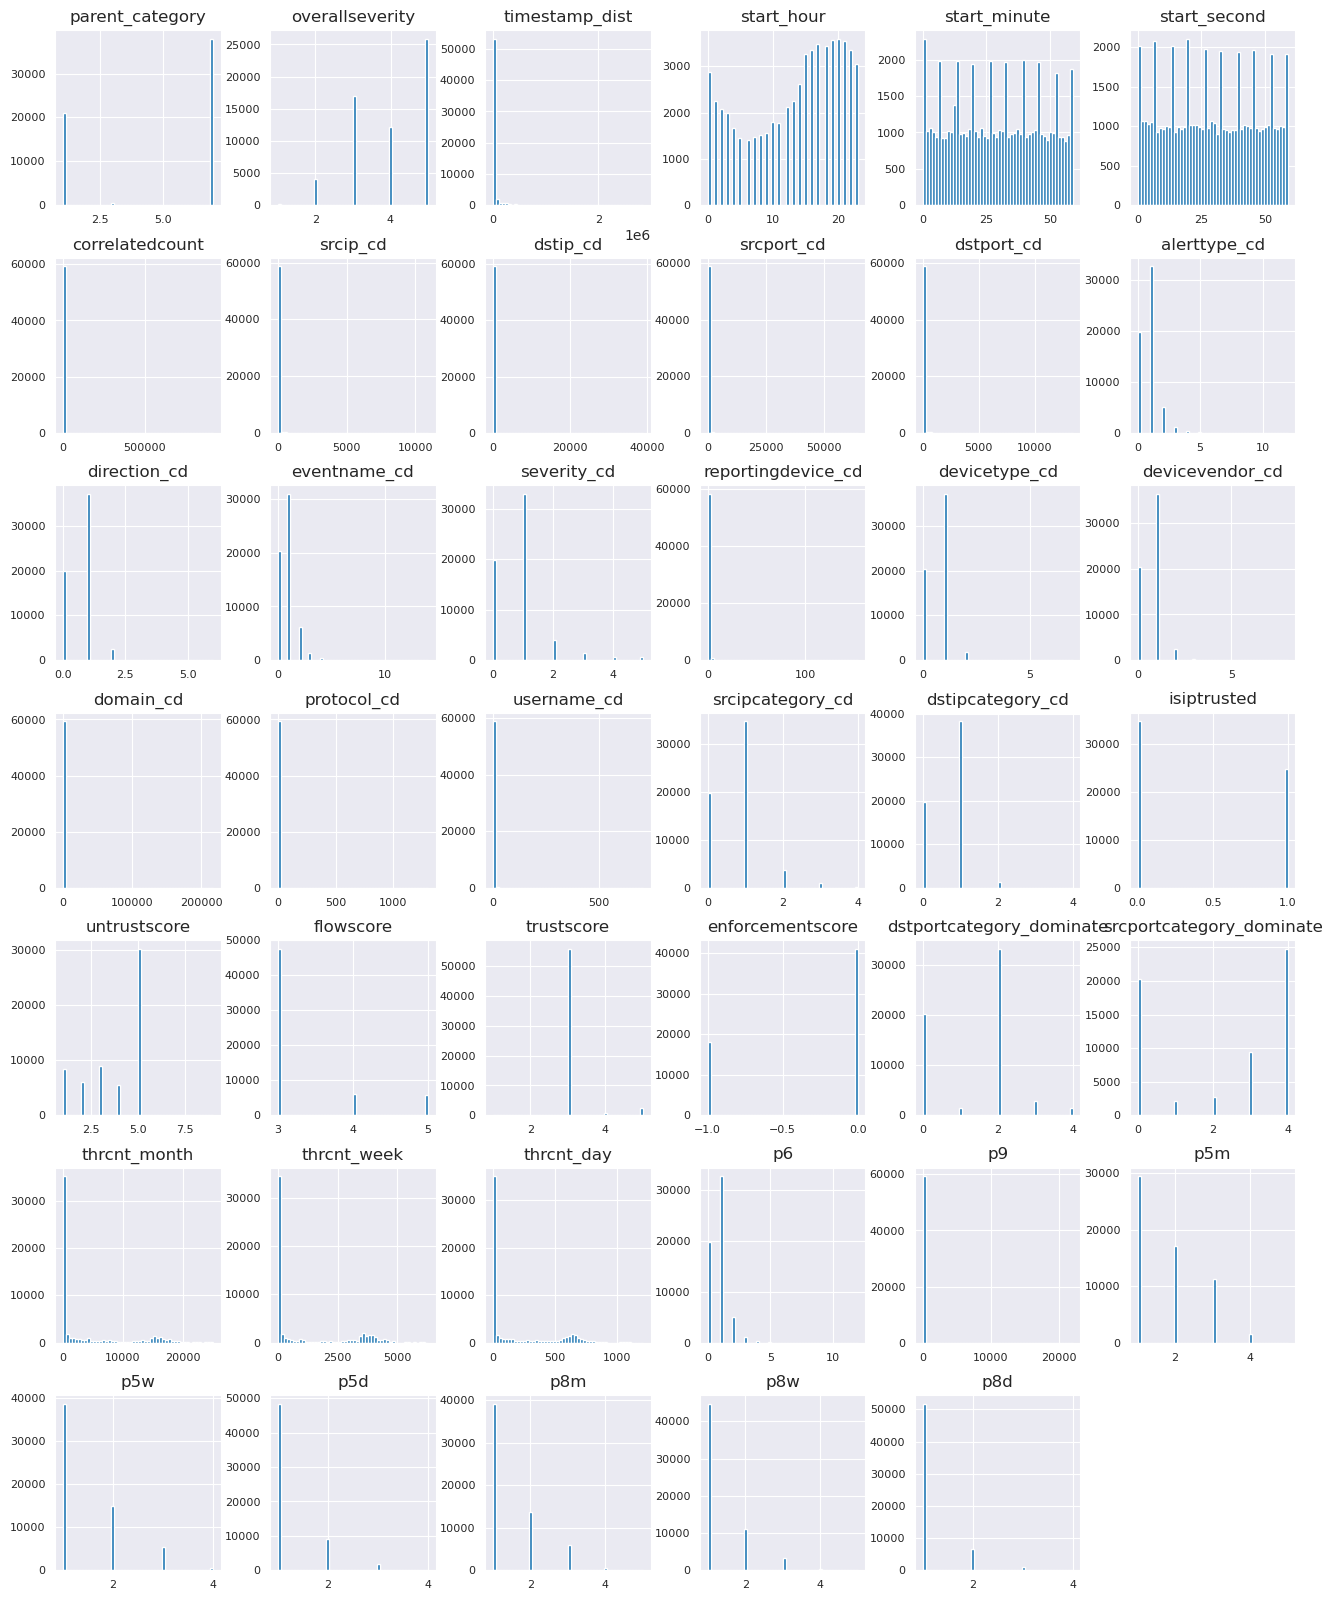

In [20]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

### Correlation

Now we'll try to find which features are correlated with `notified`. We'll store them in a var called `golden_features_list`. We'll reuse our `df_num` dataset to do so.

In [37]:
df_train_num = df_train.select_dtypes(include='int64')
df_num_corr = df_train_num.corr()['notified']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.07].sort_values(ascending=False)
print(f"There is {len(golden_features_list)-1} correlated values with 'notified':\n{golden_features_list}")

There is 10 correlated values with 'notified':
notified           1.000000
isiptrusted        0.144483
flowscore          0.122008
p8m                0.111659
p8w                0.099042
p8d                0.078229
p5w                0.072898
parent_category   -0.135884
thrcnt_month      -0.152947
thrcnt_day        -0.167667
thrcnt_week       -0.172057
Name: notified, dtype: float64
